In [131]:
import pandas as pd
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px




In [132]:
sr = pd.read_csv('TFP.csv')

In [133]:
sr

,isocode,year,rtfpna
0,USA,1950,0.617148
1,USA,1951,0.629588
2,USA,1952,0.638451
3,USA,1953,0.651858
4,USA,1954,0.646179
...,...,...,...
181,MEX,2007,1.013673
182,MEX,2008,0.991548
183,MEX,2009,0.915879
184,MEX,2010,0.941604


In [134]:
nr = sr.sort_values(by='year')

In [135]:
nusa = sr.loc[sr['isocode']=='USA']

In [136]:
nusa

,isocode,year,rtfpna
0,USA,1950,0.617148
1,USA,1951,0.629588
2,USA,1952,0.638451
3,USA,1953,0.651858
4,USA,1954,0.646179
...,...,...,...
57,USA,2007,1.006595
58,USA,2008,0.998499
59,USA,2009,0.986738
60,USA,2010,1.009463


In [137]:
ncan = sr.loc[sr['isocode']=='CAN']

In [138]:
ncan

,isocode,year,rtfpna
62,CAN,1950,0.843335
63,CAN,1951,0.855123
64,CAN,1952,0.896489
65,CAN,1953,0.910658
66,CAN,1954,0.875178
...,...,...,...
119,CAN,2007,0.981433
120,CAN,2008,0.958357
121,CAN,2009,0.926482
122,CAN,2010,0.932567


In [139]:
nmex = sr.loc[sr['isocode']=='MEX']

In [140]:
nmex

,isocode,year,rtfpna
124,MEX,1950,0.798159
125,MEX,1951,0.860931
126,MEX,1952,0.876968
127,MEX,1953,0.855204
128,MEX,1954,0.929168
...,...,...,...
181,MEX,2007,1.013673
182,MEX,2008,0.991548
183,MEX,2009,0.915879
184,MEX,2010,0.941604


**QUESTÃO 01**

In [141]:
eua = nusa.groupby(by='year')['rtfpna'].sum()

dteua = pd. DataFrame(eua)
dteua.reset_index(inplace=True)
dteua.columns = ['year', 'rtfpna']

fig = px.line(dteua, x='year', y='rtfpna', title='Estados Unidos da América')
fig.update_xaxes(rangeslider_visible=True)
fig.show()


No gráfico acima tem-se a série temporal do indicador RTFPNA para o Estados Unidos (1950 - 2011).

In [142]:
gusa = pd.Series(nusa['rtfpna'])


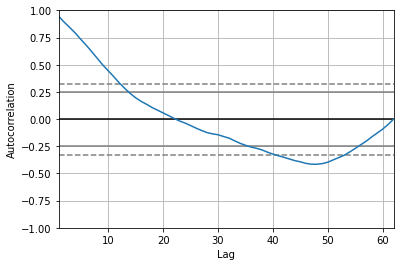

In [143]:
# autocorrelation_plot
autocorrelation_plot(gusa)
plt.show()

No gráfico acima tem-se a autocorrelação dos dados da série temporal para os Estados Unidos.

In [144]:
cnd = ncan.groupby(by='year')['rtfpna'].sum()

dtca = pd. DataFrame(cnd)
dtca.reset_index(inplace=True)
dtca.columns = ['year', 'rtfpna']

fig = px.line(dtca, x='year', y='rtfpna', title='Canadá')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

No gráfico acima tem-se a série temporal do indicador RTFPNA para o Canadá (1950 - 2011).

In [145]:
gcan = pd.Series(ncan['rtfpna'])

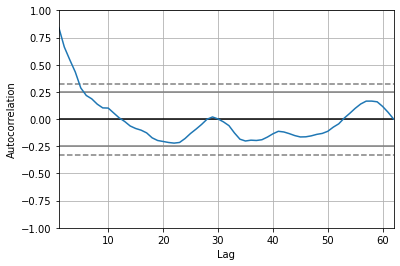

In [146]:
# autocorrelation_plot
autocorrelation_plot(gcan)
plt.show()

No gráfico acima tem-se a autocorrelação dos dados da série temporal para o Canadá.

In [147]:
mx = nmex.groupby(by='year')['rtfpna'].sum()

dtmx = pd. DataFrame(mx)
dtmx.reset_index(inplace=True)
dtmx.columns = ['year', 'rtfpna']

fig = px.line(dtmx, x='year', y='rtfpna', title='México')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

No gráfico acima tem-se a série temporal do indicador RTFPNA para o México (1950 - 2011).

In [148]:
gmex = pd.Series(nmex['rtfpna'])

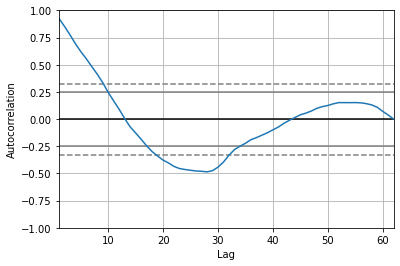

In [149]:
# autocorrelation_plot
autocorrelation_plot(gmex)
plt.show()

No gráfico acima tem-se a autocorrelação dos dados da série temporal para o México.

**Análise das Séries**


Analisando as três séries percebe-se o caráter não-estacionário das mesmas.
Sendo que no caso dos **Estados Unidos** é nítido o crescimento produtivo ao longo da série temporal.
No caso do **Canadá** observa-se um crescimento até 1970, mantendo-se em
oscilação em torno de uma média até 2000. De 2000 em diante houve uma
queda abrupta na produtividade.
Em relação ao **México** observa-se também um crescimento até 1970,
mantendo-se numa constante até 1980. Da década de 80 em diante houve uma
queda gradual na produtividade.

**QUESTÃO 02**

**FORECAST**

Devido ao caráter **não-estacionário** das três séries utilizou-se o método **ARIMA** para a análise preditiva das mesmas para 10 anos.
Inicialmente analisou-se a **autocorrelação** dos valores das séries para
determinar os melhores parâmetros de entrada no método.
Analisando os gráficos de autocorrelação percebeu-se um alto grau de correlação para as três séries nos últimos 5 (cinco) anos das mesmas (LAGS 1~5). Tal comportamento foi considerado nos parâmetros de entrada do método ARIMA.

In [150]:
from statsmodels.tsa.arima_model import ARIMA

In [151]:
model = ARIMA(gusa, order=(5,1,1))

In [152]:
model_usa = model.fit()

In [153]:
print(model_usa.summary())

                             ARIMA Model Results                              
Dep. Variable:               D.rtfpna   No. Observations:                   61
Model:                 ARIMA(5, 1, 1)   Log Likelihood                 187.558
Method:                       css-mle   S.D. of innovations              0.011
Date:                Wed, 08 Jul 2020   AIC                           -359.116
Time:                        16:51:17   BIC                           -342.229
Sample:                             1   HQIC                          -352.498
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0066      0.001      4.637      0.000       0.004       0.009
ar.L1.D.rtfpna    -0.7375      0.985     -0.748      0.457      -2.669       1.194
ar.L2.D.rtfpna     0.0141      0.163

In [154]:
predic_usa = model_usa.forecast(steps=10) [0]
predic_usa

array([1.02776026, 1.03135628, 1.03811538, 1.04539945, 1.05206569,
       1.05867251, 1.06494372, 1.07173035, 1.07818566, 1.08489146])

In [155]:
predictionusa = pd.Series(predic_usa)
predictionusa

0    1.027760
1    1.031356
2    1.038115
3    1.045399
4    1.052066
5    1.058673
6    1.064944
7    1.071730
8    1.078186
9    1.084891
dtype: float64

In [156]:
year_usa = pd.Series(range(2011,2021,1))

In [157]:
year_usa

0    2011
1    2012
2    2013
3    2014
4    2015
5    2016
6    2017
7    2018
8    2019
9    2020
dtype: int64

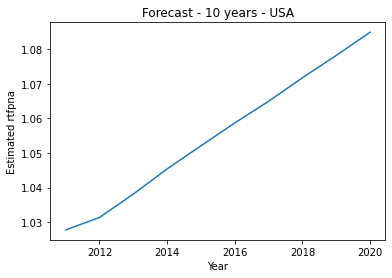

In [158]:
plt.plot(year_usa, predictionusa)
plt.xlabel('Year')
plt.ylabel('Estimated rtfpna')
plt.title('Forecast - 10 years - USA')
plt.show()

No gráfico acima tem-se a previsão para os próximos 10 anos da série temporal - **Estados Unidos**.

In [159]:
model = ARIMA(gcan, order=(5,1,1))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



In [160]:
model_can = model.fit()

In [161]:
print(model_can.summary())

                             ARIMA Model Results                              
Dep. Variable:               D.rtfpna   No. Observations:                   61
Model:                 ARIMA(5, 1, 1)   Log Likelihood                 161.869
Method:                       css-mle   S.D. of innovations              0.017
Date:                Wed, 08 Jul 2020   AIC                           -307.738
Time:                        16:51:18   BIC                           -290.851
Sample:                             1   HQIC                          -301.119
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0014      0.003      0.523      0.603      -0.004       0.007
ar.L1.D.rtfpna    -0.2297      0.300     -0.765      0.448      -0.818       0.359
ar.L2.D.rtfpna    -0.0763      0.157

In [162]:
predic_can = model_can.forecast(steps=10) [0]
predic_can

array([0.92335377, 0.92792025, 0.93720266, 0.93423554, 0.936196  ,
       0.94051605, 0.94127788, 0.9401421 , 0.94344106, 0.94481654])

In [163]:
predictioncan = pd.Series(predic_can)
predictioncan

0    0.923354
1    0.927920
2    0.937203
3    0.934236
4    0.936196
5    0.940516
6    0.941278
7    0.940142
8    0.943441
9    0.944817
dtype: float64

In [164]:
year_can = pd.Series(range(2011,2021,1))

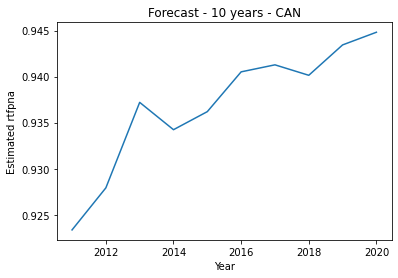

In [165]:
plt.plot(year_can, predictioncan)
plt.xlabel('Year')
plt.ylabel('Estimated rtfpna')
plt.title('Forecast - 10 years - CAN')
plt.show()

No gráfico acima tem-se a previsão para os próximos 10 anos da série temporal - **Canadá**.

In [166]:
model = ARIMA(gmex, order=(5,1,1))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



In [167]:
model_mex = model.fit()

In [168]:
print(model_mex.summary())

                             ARIMA Model Results                              
Dep. Variable:               D.rtfpna   No. Observations:                   61
Model:                 ARIMA(5, 1, 1)   Log Likelihood                 121.933
Method:                       css-mle   S.D. of innovations              0.033
Date:                Wed, 08 Jul 2020   AIC                           -227.866
Time:                        16:51:19   BIC                           -210.979
Sample:                             1   HQIC                          -221.248
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0031      0.007      0.413      0.682      -0.011       0.018
ar.L1.D.rtfpna    -0.4012      0.220     -1.827      0.073      -0.832       0.029
ar.L2.D.rtfpna     0.1441      0.141

In [169]:
predic_mex = model_mex.forecast(steps=10) [0]
predic_mex

array([0.94603859, 0.93785258, 0.957561  , 0.95228606, 0.95533307,
       0.95682716, 0.96526036, 0.96223071, 0.96900527, 0.96983993])

In [170]:
predictionmex = pd.Series(predic_mex)
predictionmex

0    0.946039
1    0.937853
2    0.957561
3    0.952286
4    0.955333
5    0.956827
6    0.965260
7    0.962231
8    0.969005
9    0.969840
dtype: float64

In [171]:
year_mex = pd.Series(range(2011,2021,1))

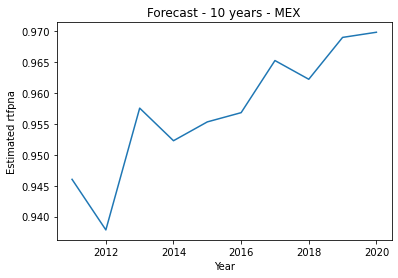

In [172]:
plt.plot(year_mex, predictionmex)
plt.xlabel('Year')
plt.ylabel('Estimated rtfpna')
plt.title('Forecast - 10 years - MEX')
plt.show()

No gráfico acima tem-se a previsão para os próximos 10 anos da série temporal - **México**.

**ANÁLISE DA SÉRIES PREDITIVAS**

Com base nos gráficos preditivos percebe-se uma continuidade no crescimento produtivo dos **Estados Unidos**. Percebe-se também uma retomada no crescimento para o **Canadá**. Bem como a retomada do crescimento produtivo do **México** a partir de 2012. Sendo que a amplitude de crescimento será maior para os **Estados Unidos**.

**QUESTÃO 03**

Sim, há vários materiais úteis para o estudo de séries de Fator Total de Produtividade.

Um artigo que me foi bastante útil é o dado pelo link abaixo:

https://www.business.unsw.edu.au/About-Site/Schools-Site/Economics-Site/Documents/Explaining-Total-Factor-Productivity.pdf